In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
page = 'https://en.wikipedia.org/wiki/World_record_progression_track_cycling_%E2%80%93_Men%27s_team_pursuit'
df = pd.read_html(page)[1]

In [28]:
df.columns = df.iloc[0]
df.drop(df.index[0],inplace=True)

In [29]:
df

,Time,Cyclist,"Velodrome, location",Track,Date,Meeting,Ref
1,4:03.840,AustraliaBrett AitkenStuart O'GradyTim O'Shane...,Hamar (NOR),Indoor,20 August 1993,NaN,NaN
2,4:00.958,ItalyAdler CapelliCristiano CittonAndrea Colli...,Manchester (GBR),Indoor,31 August 1996,NaN,NaN
3,4:00.830,UkraineOleksandr FedenkoOleksandr SymonenkoSer...,Sydney (AUS),Indoor,19 September 2000,2000 Olympics,[2]
4,3:59.710,GermanyGuido FulstRobert BartkoDaniel BeckeJen...,Sydney (AUS),Indoor,19 September 2000,2000 Olympics,[2]
5,3:59.583,AustraliaLuke RobertsMark RenshawPeter DawsonG...,Manchester (GBR),Indoor,1 August 2002,2002 Commonwealth Games,NaN
6,3:57.280,AustraliaLuke RobertsBrett LancasterPeter Daws...,Stuttgart (GER),Indoor,2 August 2003,NaN,NaN
7,3:56.610,AustraliaLuke RobertsBrett LancasterBrad Mcgee...,Athens (GRE),Indoor,22 August 2004,2004 Olympics,NaN
8,3:56.322,Great BritainEdward ClancyGeraint ThomasPaul M...,Manchester (GBR),Indoor,27 March 2008,2008 World Championships,[3]
9,3:55.202,Great BritainEdward ClancyPaul ManningGeraint ...,"Laoshan, Beijing (CHN)",Indoor,17 August 2008,2008 Olympics,NaN
10,3:53.314,Great BritainEdward ClancyPaul ManningGeraint ...,Laoshan. Beijing (CHN),Indoor,18 August 2008,2008 Olympics,NaN


In [30]:
df['DateTime'] = pd.to_datetime(df['Date'])


In [31]:
df['Record'] = pd.to_datetime(df['Time'],format='%M:%S.%f')

In [32]:
#import datetime
#df['Record'] = [datetime.datetime.time(d) for d in df['Record']] 

In [34]:
import datetime
ytickvals =  ['03:40','03:42','03:44','03:46','03:48','03:50','03:52','03:54','03:56','03:58','04:00','04:02','04:04','04:06']
ytickvalstime = [datetime.datetime.strptime('1900-01-01 ' + str,'%Y-%m-%d %M:%S') for str in ytickvals]

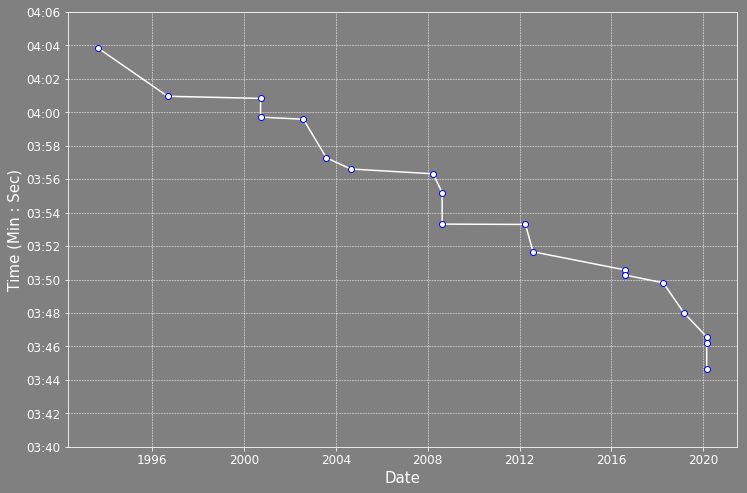

In [35]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.rcParams['figure.facecolor']='grey'
plt.rcParams['axes.facecolor']='grey'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes.edgecolor']='white'

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df['DateTime'],df['Record'],'w')
ax.plot(df['DateTime'],df['Record'],'wo',markeredgecolor='b')


plt.yticks(ytickvalstime)
#ax.format_ydata = mdates.DateFormatter('%M:%S')
#myFmt = DateFormatter('%M:%S.%f')
#ax.yaxis.set_major_formatter(myFmt)
#ax.yaxis_date()
ax.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
ax.grid(color='w', linestyle='--', linewidth=0.5)


plt.xlabel('Date', fontsize=15 , color='white')
plt.ylabel('Time (Min : Sec)', fontsize=15 , color='white')
plt.tick_params(labelsize=12)

#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%M:%S.%f'))

In [ ]:
plt.rcParams.keys()